In [1]:
#Importing required library
import joblib
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVR
from sklearn.svm import SVC
from keras.layers import Dense
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.utils import to_categorical
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score

warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", message=".*deprecated.*")


Engineer: Adeola Odunewu
Intern: FlipRobo LLC DS1123
Project: Loan Global Power Plant Classification

In [2]:
# File paths for the CSV files
urlAUS = r"C:\Users\Apelu\OneDrive\Desktop\Global Power Plant Project\database_AUS.csv"
urlIND = r"C:\Users\Apelu\OneDrive\Desktop\Global Power Plant Project\database_IND.csv"
urlUSA = r"C:\Users\Apelu\OneDrive\Desktop\Global Power Plant Project\database_USA.csv"

# Read CSV files into DataFrame objects
df1 = pd.read_csv(urlAUS)  # Reading data from Australia
df2 = pd.read_csv(urlIND)  # Reading data from India
df3 = pd.read_csv(urlUSA)  # Reading data from USA


In [25]:
df1.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,NaN,NaN,...,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN,Australia Clean Energy Regulator,NaN
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df2.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,2.41461,617.789264,843.747,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN


In [5]:
df3.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,USA,United States of America,10 Briggs Solar NG LLC (East),USA0062781,0.0,41.6327,-71.4963,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USA,United States of America,100 Brook Hill Drive Solar,USA0063292,2.0,41.0930,-73.9828,Solar,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,2.467,U.S. Energy Information Administration,NaN
2,USA,United States of America,1001 Ebenezer Church Solar,USA0063444,0.0,36.2838,-80.8434,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USA,United States of America,1008 Matthews Solar,USA0063447,0.0,36.2167,-80.5525,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USA,United States of America,1009 Yadkin Solar,USA0063445,0.0,36.1475,-80.6561,NaN,NaN,NaN,...,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Combine the three DataFrames into a single DataFrame
combined_df = pd.concat([df1, df2, df3], axis=0, ignore_index=True)

In [7]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13298 entries, 0 to 13297
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   13298 non-null  object 
 1   country_long              13298 non-null  object 
 2   name                      13298 non-null  object 
 3   gppd_idnr                 13298 non-null  object 
 4   capacity_mw               13292 non-null  float64
 5   latitude                  13220 non-null  float64
 6   longitude                 13220 non-null  float64
 7   primary_fuel              11294 non-null  object 
 8   other_fuel1               1628 non-null   object 
 9   other_fuel2               270 non-null    object 
 10  other_fuel3               92 non-null     object 
 11  commissioning_year        10654 non-null  float64
 12  owner                     12705 non-null  object 
 13  source                    13298 non-null  object 
 14  url   

In [7]:
combined_df['country']

0        AUS
1        AUS
2        AUS
3        AUS
4        AUS
        ... 
13293    USA
13294    USA
13295    USA
13296    USA
13297    USA
Name: country, Length: 13298, dtype: object

In [50]:
categorical_data = []
for item in combined_df.dtypes.index:
    if combined_df.dtypes[item] == 'O':
        categorical_data.append(item)
print('Categorical Data',categorical_data)

numeric_data = []
for items in combined_df.dtypes.index:
    if combined_df.dtypes[items] == 'int64' or combined_df.dtypes[items] == 'float64':
        numeric_data.append(items)
print('Numeric Data',numeric_data)
        

Categorical Data ['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel', 'owner', 'source', 'url', 'geolocation_source']
Numeric Data ['capacity_mw', 'latitude', 'longitude', 'commissioning_year', 'year_of_capacity_data', 'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018']


In [51]:
combined_df.nunique().to_frame("Unique Values")

,Unique Values
country,3
country_long,3
name,13266
gppd_idnr,13298
capacity_mw,2304
latitude,12386
longitude,1342
primary_fuel,14
commissioning_year,1936
owner,5877


Geographical Information: The dataset covers data from 3 unique countries, with latitude and longitude coordinates representing diverse 
geographic locations of power plants.

Power Plant Characteristics: Power plants in the dataset have varying capacities, with 2304 unique capacity values observed. Primary fuel types used in power generation include 14 categories, indicating a diverse energy mix.

Data Sources: The dataset contains information from 206 unique sources, including data related to geolocation and generation.

Ownership and Identifiers: The dataset includes power plants owned by 5877 unique entities, with 13266 unique names and identifiers. URLs associated with power plants are provided from 325 unique sources.

Generation Data: Electricity generation data spans multiple years, with varying values observed each year from 2013 to 2019. The number of unique values for generation data suggests variability in electricity production over time.

Miscellaneous: Some columns have missing or uniform data, such as wepp_id and estimated_generation_gwh, indicating potential data quality issues.

In [27]:
# Selecting columns with object dtype from the DataFrame and printing them
cate_df = combined_df.select_dtypes(include=['object'])
cate_df.head()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,other_fuel3,owner,source,url,geolocation_source,generation_gwh_2019,generation_data_source
0,AUS,Australia,Adelaide Airport,AUS0000433,Solar,NaN,NaN,NaN,Adelaide Airport Ltd,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,Solar,NaN,NaN,NaN,Adelaide Showgrounds,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN
2,AUS,Australia,Albany Wind Farm,AUS0000065,Wind,NaN,NaN,NaN,Verve Energy,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,NaN,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,AUS0000469,Solar,NaN,NaN,NaN,Alice Springs Airport,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN
4,AUS,Australia,Amcor Gawler,AUS0000231,Oil,NaN,NaN,NaN,Energy Response,Australian Renewable Energy Mapping Infrastruc...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,NaN,NaN


In [5]:
# Selecting columns with int64 or float64 dtype from the DataFrame and printing them
numeric_df = combined_df.select_dtypes(include=['int64', 'float64'])
numeric_df.head()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
0,0.11,-34.9387,138.5377,2011.0,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,-34.9453,138.5882,NaN,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.60,-35.0641,117.7977,NaN,NaN,2019.0,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,NaN
3,0.24,-23.7966,133.8971,2004.0,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.00,-34.5509,138.7659,2015.0,NaN,2019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Describing summary statistics of numeric columns
numeric_df.describe()

,capacity_mw,latitude,longitude,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,estimated_generation_gwh
count,13292.000000,13220.000000,13220.000000,10654.000000,0.0,12860.0,7170.000000,7534.000000,7993.000000,8701.000000,9292.000000,9858.000000,0.0
mean,117.738717,35.053213,-73.794217,1998.184904,NaN,2019.0,563.383222,635.739731,616.801877,561.784508,532.472482,513.679016,NaN
std,347.169038,15.444195,62.868834,24.017781,NaN,0.0,2030.523760,2193.172655,2148.167470,2050.411295,2001.411908,1963.485305,NaN
min,0.000000,-42.888300,-171.712400,1896.000000,NaN,2019.0,-947.600000,-989.619000,-864.428000,-768.620000,-934.944000,-982.622000,NaN
25%,1.500000,33.901700,-104.659875,1988.000000,NaN,2019.0,1.653075,2.018000,2.140000,2.108000,2.063750,2.141250,NaN
50%,5.500000,38.389750,-87.346000,2008.000000,NaN,2019.0,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,NaN
75%,52.725000,42.175125,-75.475925,2015.000000,NaN,2019.0,185.326498,217.069500,200.279000,173.348004,157.889688,149.141249,NaN
max,6809.000000,425.246100,153.434100,2020.000000,NaN,2019.0,31431.080000,32320.917000,32525.595000,32377.477000,35116.000000,35136.000000,NaN


In [14]:
# Describing summary statistics of categorical columns
cate_df.describe()

,country,country_long,name,gppd_idnr,primary_fuel,other_fuel1,other_fuel2,other_fuel3,owner,source,url,geolocation_source,generation_gwh_2019,generation_data_source
count,13298,13298,13298,13298,11294,1628,270,92,12705,13298,13298,13275,9778.0,10835
unique,3,3,13266,13298,14,12,11,9,5877,206,325,5,8368.0,3
top,USA,United States of America,Richland,AUS0000433,Solar,Oil,Gas,Gas,Cypress Creek Renewables,U.S. Energy Information Administration,http://www.eia.gov/electricity/data/browser/,U.S. Energy Information Administration,0.0,U.S. Energy Information Administration
freq,11879,11879,3,1,3480,986,87,34,198,11833,11833,11833,366.0,10069


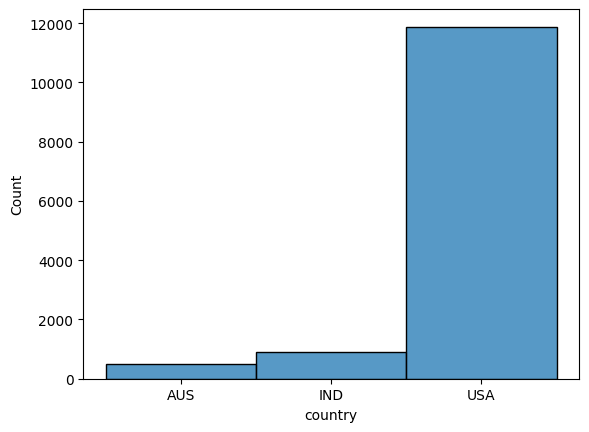

In [9]:
# Engaging in country univariate. Visualizing the frequency distribution of the country using a histogram plot
sns.histplot(data=cate_df, x='country')
plt.show()

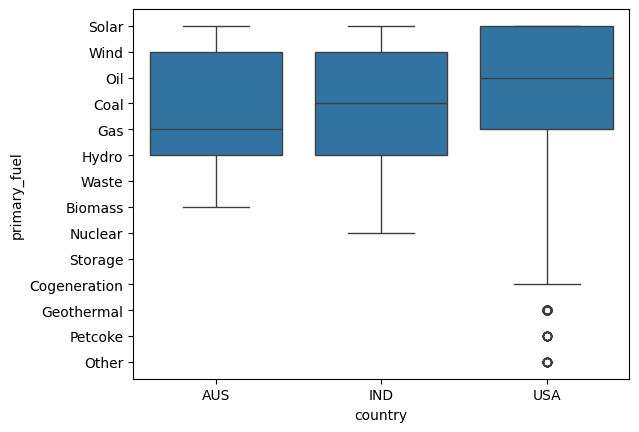

In [7]:
# Visualizing the distribution of a numerical variable across different countries using a box plot
sns.boxplot(data=cate_df, x='country', y='primary_fuel')
plt.show()

Figure 1 illustrates an uneven distribution of data, with the USA exhibiting the highest frequency, followed by IND and then AUS.

In Figure 2, the distribution represents the primary gas utilized for power plants. The median value for the USA indicates oil as the primary fuel, 
while for AUS it is gas, and for IND, it's coal. Additionally, the boxplot highlights other significant primary fuels utilized by the countries for 
power plants, including hydro, gas, coal, oil, and wind.

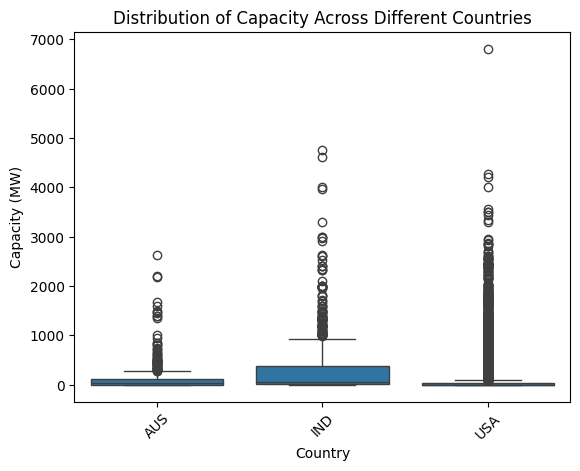

In [16]:
# Create a box plot to visualize the distribution of capacity_mw across different countries
sns.boxplot(data=combined_df, x='country', y='capacity_mw')
plt.title('Generating of Capacity Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

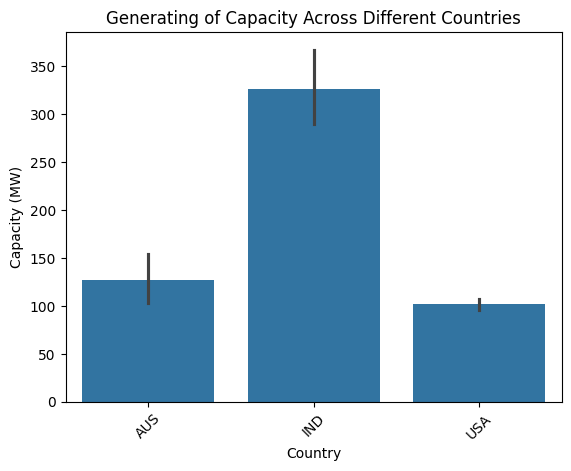

In [18]:
# Create a bar plot to visualize the distribution of 'capacity_mw' across different countries
sns.barplot(data=combined_df, x='country', y='capacity_mw')
plt.title('Generating of Capacity Across Different Countries')
plt.xlabel('Country')
plt.ylabel('Capacity (MW)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


Figure 3 a&b: The reveals that India (IND) boasts the highest electrical generating capacity in megawatts, followed by Australia (AUS) 
and the United States (USA).

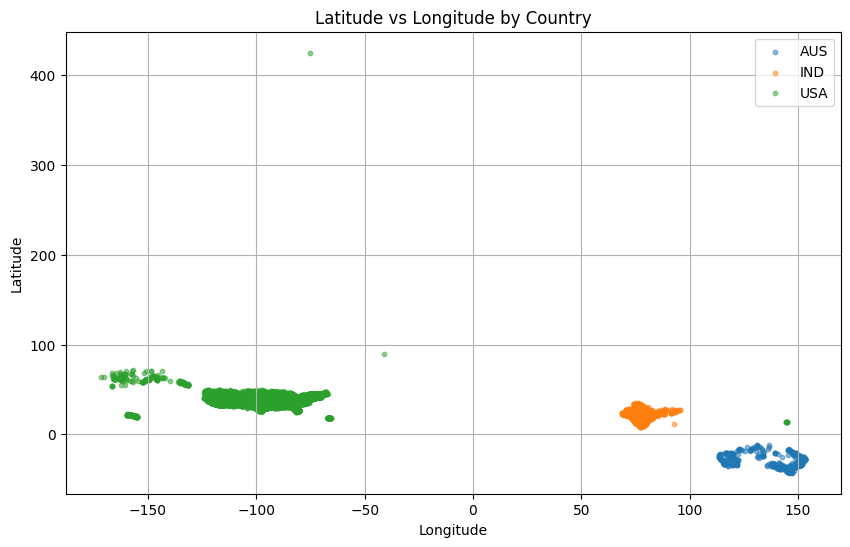

In [22]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Create a scatter plot of latitude and longitude, color-coded by country
for country_code in combined_df['country'].unique():
    country_data = combined_df[combined_df['country'] == country_code]
    plt.scatter(country_data['longitude'], country_data['latitude'], s=10, alpha=0.5, label=country_code)

# Add title and labels to the plot
plt.title('Latitude vs Longitude by Country')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

plt.legend()

# Add grid lines for better readability
plt.grid(True)

plt.show()

Figure 4: Creates a visualization of power plant geographic locations to assist in identifying clustering, or patterns in their distribution. 
This visualization illustrates that power plants are concentrated in specific regions across countries, thereby highlighting the spatial 
patterns in their distribution.

Note: the plot compares power plant distributions between countries and highlights similarities in their spatial arrangements.

In [5]:
# Handling missing values
missing_data = combined_df.isnull().sum()
print(missing_data)

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     6
latitude                       78
longitude                      78
primary_fuel                 2004
other_fuel1                 11670
other_fuel2                 13028
other_fuel3                 13206
commissioning_year           2644
owner                         593
source                          0
url                             0
geolocation_source             23
wepp_id                     13298
year_of_capacity_data         438
generation_gwh_2013          6128
generation_gwh_2014          5764
generation_gwh_2015          5305
generation_gwh_2016          4597
generation_gwh_2017          4006
generation_gwh_2018          3440
generation_gwh_2019          3520
generation_data_source       2463
estimated_generation_gwh    13298
dtype: int64


Imputation of Missing Values:

Year of Capacity Data: Missing values in the year_of_capacity_data column were imputed with the median value.
Generation Data (2013-2019): Missing values in the columns representing generation data from 2013 to 2019 were imputed with their respective median values.

Handling of Missing and Redundant Columns:

Generation Data Source: The generation_data_source column contained missing values. As a result, this column will be dropped in future.

WEPP ID and Estimated Generation GWh: Both wepp_id and estimated_generation_gwh columns were found to have missing values and were deemed redundant for our analysis. Therefore, these columns were dropped from the dataset.

Other Fuel Columns: Columns other_fuel1, other_fuel2, and other_fuel3 may be considered for removal as part of the restructuring plan. Given their lack of relevance to the analysis, these columns were dropped from the dataset.

In [20]:
# Iterate over each column and impute missing values with the median
for column in combined_df.columns:
    if combined_df[column].dtype != object:  # Check if the column contains numeric data
        median_value = combined_df[column].median()  # Calculate the median value of the column
        combined_df[column].fillna(median_value, inplace=True)  # Fill missing values with the median

In [21]:
# List of columns with categorical data
categorical_columns = combined_df.select_dtypes(include=['object'])

# Iterate over each column and replace missing values with the mode
for column in categorical_columns:
    mode_value = combined_df[column].mode().iloc[0]  # Calculate the mode value of the column
    combined_df[column].fillna(mode_value, inplace=True)  # Fill missing values with the mode


In [6]:
# Rechecking missing data
combined_df.isnull().sum()

country                         0
country_long                    0
name                            0
gppd_idnr                       0
capacity_mw                     0
latitude                        0
longitude                       0
primary_fuel                    0
other_fuel1                     0
other_fuel2                     0
other_fuel3                     0
commissioning_year              0
owner                           0
source                          0
url                             0
geolocation_source              0
wepp_id                     13298
year_of_capacity_data           0
generation_gwh_2013             0
generation_gwh_2014             0
generation_gwh_2015             0
generation_gwh_2016             0
generation_gwh_2017             0
generation_gwh_2018             0
generation_gwh_2019             0
generation_data_source          0
estimated_generation_gwh    13298
dtype: int64

In [7]:
# Dropping estimated_generation_gwh and wepp_id columns
combined_df.drop(['estimated_generation_gwh', 'wepp_id','year_of_capacity_data'], axis=1, inplace=True)

In [10]:
# Looking at the data
combined_df.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,url,geolocation_source,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source
0,AUS,Australia,Adelaide Airport,AUS0000433,0.11,-34.9387,138.5377,Solar,Oil,Gas,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,0.0,U.S. Energy Information Administration
1,AUS,Australia,Adelaide Showgrounds,AUS0000432,1.00,-34.9453,138.5882,Solar,Oil,Gas,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,0.0,U.S. Energy Information Administration
2,AUS,Australia,Albany Wind Farm,AUS0000065,21.60,-35.0641,117.7977,Wind,Oil,Gas,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,89.595278,102.642778,96.555556,95.872778,85.900278,92.682222,0.0,Australia Clean Energy Regulator
3,AUS,Australia,Alice Springs Airport,AUS0000469,0.24,-23.7966,133.8971,Solar,Oil,Gas,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,0.0,U.S. Energy Information Administration
4,AUS,Australia,Amcor Gawler,AUS0000231,4.00,-34.5509,138.7659,Oil,Oil,Gas,...,https://www.nationalmap.gov.au/,Australian Renewable Energy Mapping Infrastruc...,21.384500,22.241000,19.504000,15.410278,13.433861,12.308500,0.0,U.S. Energy Information Administration


In [10]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Fit the ANOVA model using Ordinary Least Squares (OLS)
model = ols('capacity_mw ~ primary_fuel + country', data=combined_df).fit()

# Perform ANOVA using Type II sum of squares
anova_table = sm.stats.anova_lm(model, typ=2)

# Display the ANOVA table
print(anova_table)

                    sum_sq       df           F    PR(>F)
primary_fuel  5.540027e+08     13.0  563.001083  0.000000
country       7.005938e+05      2.0    4.627825  0.009792
Residual      1.005363e+09  13282.0         NaN       NaN


For the primary_fuel factor: The F-statistic is 563.00 with a very low p-value (close to 0), indicating that the primary_fuel factor significantly explains the variability in the dependent variable.
For the country factor: The F-statistic is 4.63 with a p-value of 0.0098, indicating that the country factor also has a statistically significant effect on the dependent variable, although the effect may be smaller compared to primary_fuel.
The Residual row represents the unexplained variability in the dependent variable after accounting for the effects of primary_fuel and country.

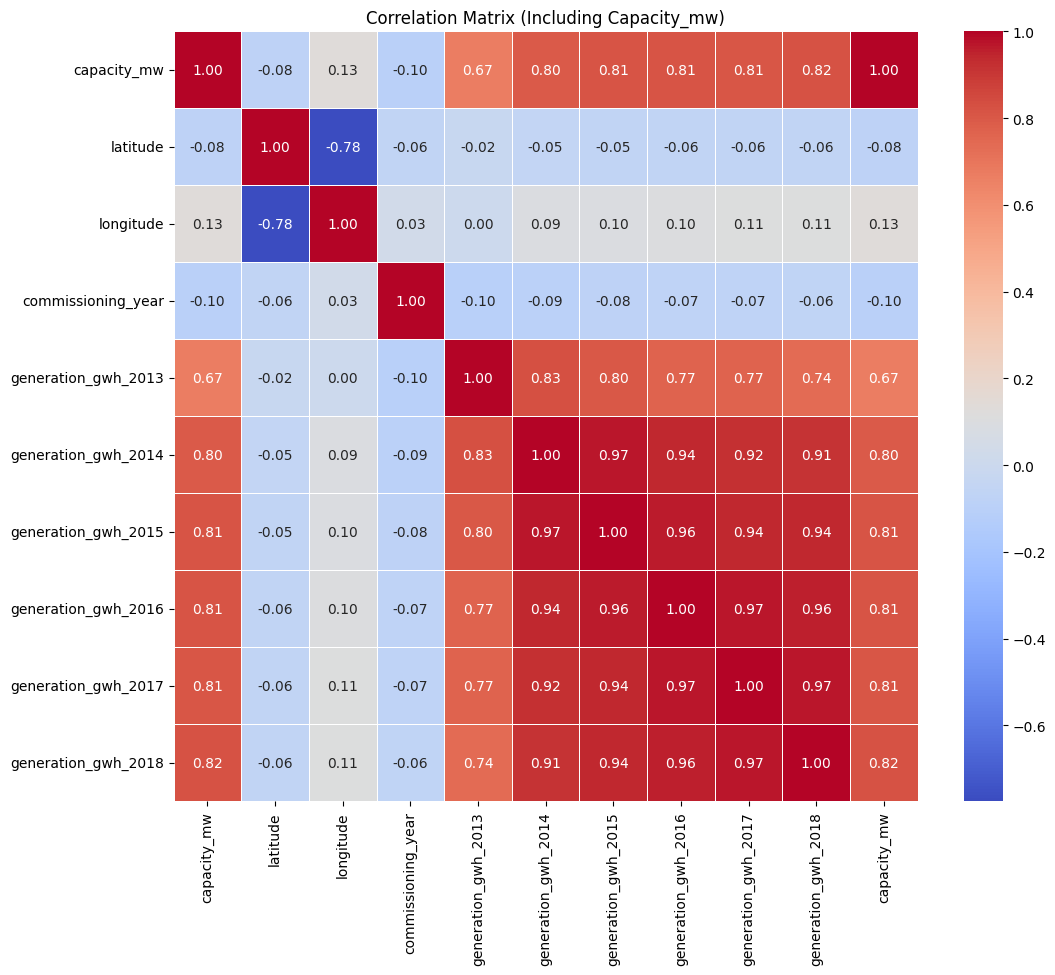

In [8]:
# Reselecting numeric variable
numeric_dataR = combined_df.select_dtypes(include=['int64', 'float64'])

# Correlation Analysis for X is the DataFrame
correlation_matrix = numeric_dataR.corr()

# Calculate correlation coefficients between all predictor variables and the target variable, capacity_mw
correlation_with_ap = numeric_dataR.corrwith(numeric_dataR['capacity_mw'])

# Concatenate the correlation coefficients with the original correlation matrix
correlation_matrix_with_ap = pd.concat([correlation_matrix, correlation_with_ap], axis=1)
correlation_matrix_with_ap.columns = list(correlation_matrix.columns) + ['capacity_mw']

# Plot the correlation matrix including the target variable
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_with_ap, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix (Including Capacity_mw)")
plt.show()

Correlation coefficients indicate strong relationships that may be worth investigating further. For example, generation_gwh_2014 and generation_gwh_2015 have a correlation coefficient of 0.969961, indicating a strong positive linear relationship. The high absolute correlation coefficient of 0.92 - 0. 98 between generation_gwh_2014 ... generation_gwh_2018 suggests the presence of multicollinearity.

In [12]:
import statsmodels.api as sm

# Define the independent variable(s) (X) and the dependent variable (y)
X = numeric_dataR.drop('capacity_mw', axis=1)  # Include all independent variables except 'capacity_mw'
y = numeric_dataR['capacity_mw']  # Select the capacity_mw column as the dependent variable

# Add a constant term to the independent variables (for intercept)
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:            capacity_mw   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3368.
Date:                Wed, 01 May 2024   Prob (F-statistic):               0.00
Time:                        12:47:29   Log-Likelihood:                -88756.
No. Observations:               13298   AIC:                         1.775e+05
Df Residuals:                   13288   BIC:                         1.776e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                1250.8468    

Model Fit: 
The regression model explains approximately 69.5% of the variance in the dependent variable (capacity_mw), as indicated by the R-squared value of 0.695.

Predictor Variables:
longitude and year_of_capacity_data have positive coefficients, indicating that an increase in these variables is associated with an increase 
in capacity_mw. commissioning_year, generation_gwh_2013, generation_gwh_2014, generation_gwh_2015, generation_gwh_2016, generation_gwh_2017, and 
generation_gwh_2018 have negative coefficients, indicating that an increase in these variables is associated with a decrease in capacity_mw. 
(Economic Factors: Older power plants might have higher maintenance costs or lower efficiency, leading to decreased capacity over time.)

latitude has a coefficient close to zero, suggesting that it has little effect on capacity_mw.

Significance of Predictors: 
All predictor variables except 'latitude' have statistically significant coefficients, as indicated by their respective p-values.

Rows with outliers:
      country              country_long                        name  \
0         AUS                 Australia            Adelaide Airport   
1         AUS                 Australia        Adelaide Showgrounds   
2         AUS                 Australia            Albany Wind Farm   
3         AUS                 Australia       Alice Springs Airport   
4         AUS                 Australia                Amcor Gawler   
...       ...                       ...                         ...   
13270     USA  United States of America                    Yorktown   
13272     USA  United States of America           Yough Hydro Power   
13276     USA  United States of America                       Yucca   
13285     USA  United States of America  Zeeland Generating Station   
13290     USA  United States of America          Zion Energy Center   

        gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0      AUS0000433         0.11  -34.9387   138.

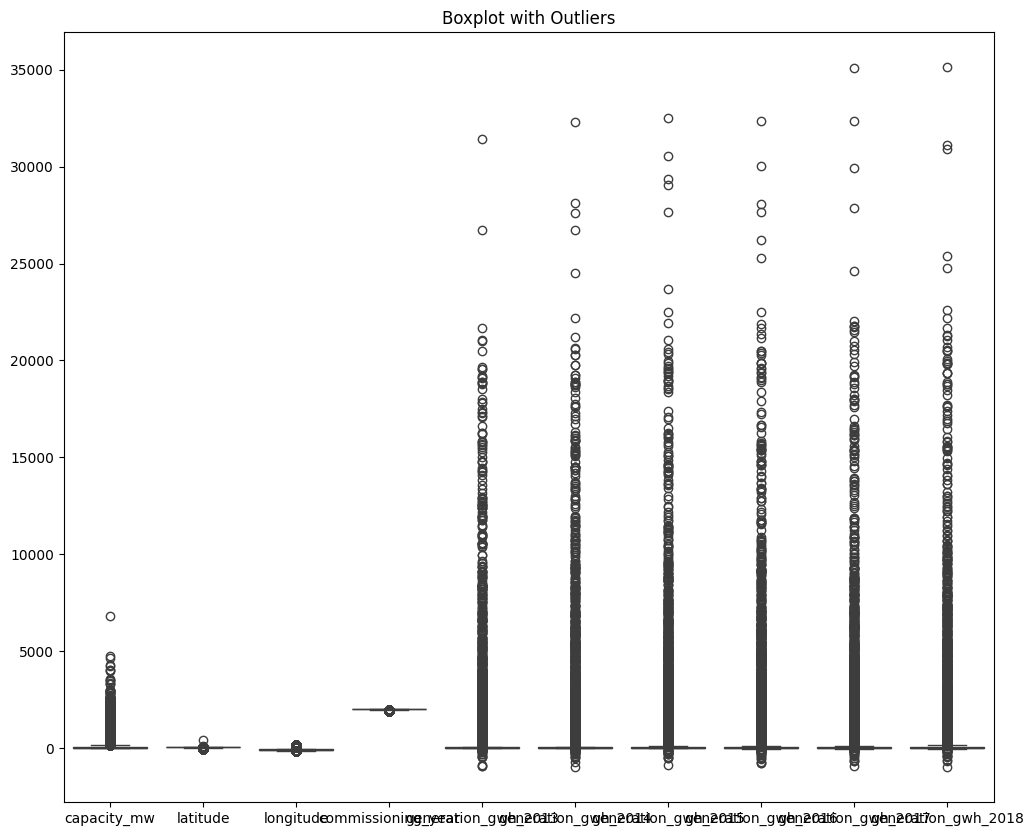

In [13]:
# Identifying Outliers
q1 = numeric_dataR.quantile(0.25)
q3 = numeric_dataR.quantile(0.75)
iqr = q3 - q1

# Define outlier conditions using IQR method
outlier_conditions = ((numeric_dataR < (q1 - 1.5 * iqr)) | (numeric_dataR > (q3 + 1.5 * iqr)))

# Display rows containing outliers
outliers = combined_df[outlier_conditions.any(axis=1)]
print("Rows with outliers:")
print(outliers)

# Visualize the outliers using a boxplot
plt.figure(figsize=(12, 10))  
sns.boxplot(data=numeric_dataR)  
plt.title("Boxplot with Outliers")
plt.show()


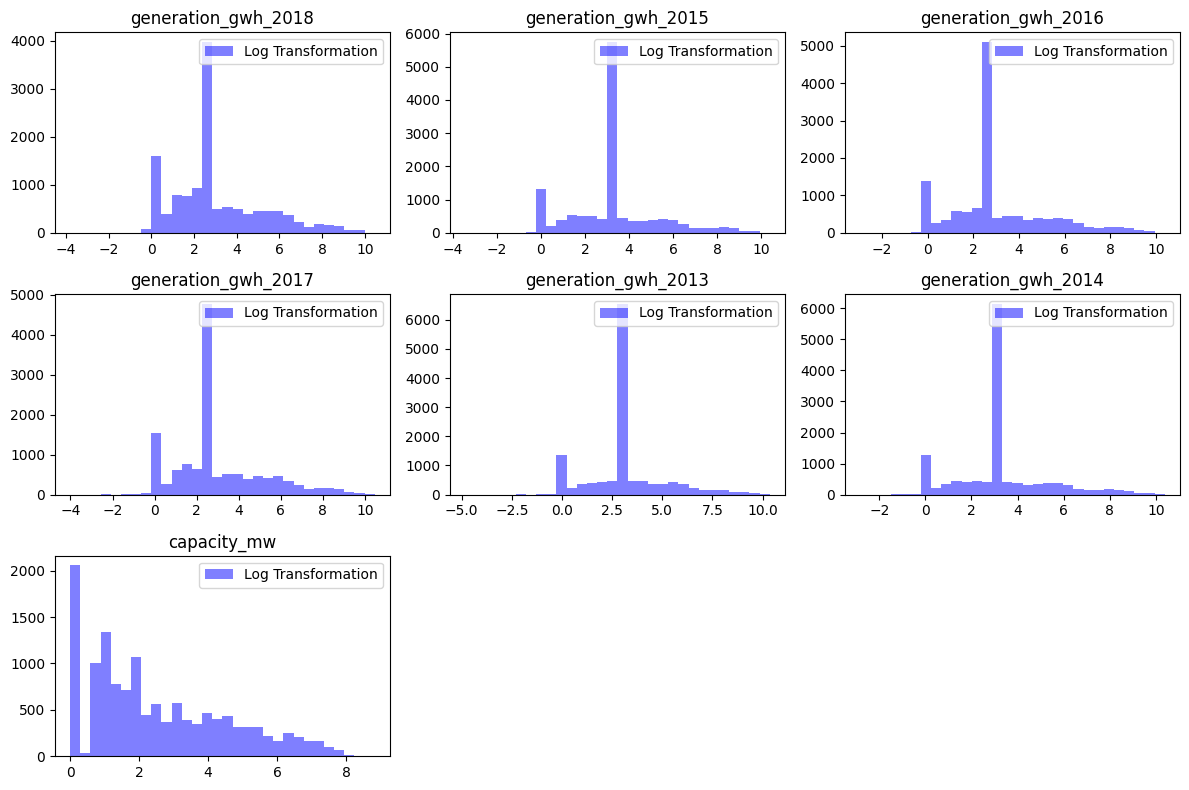

In [9]:
# Handling outliers
# Step 1: Identify Variables with Outliers
outlier_vars = ['generation_gwh_2018', 'generation_gwh_2015', 'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2013', 'generation_gwh_2014', 'capacity_mw']

# Step 2: Apply Logarithmic Transformation
# Logarithmic Transformation
log_transformed_vars = combined_df[outlier_vars].apply(lambda x: np.log(x + 1))  # Adding 1 to avoid log(0) issues

# Replace the original columns with the transformed columns
combined_df[outlier_vars] = log_transformed_vars  

# Visualize the transformed data
plt.figure(figsize=(12, 8))
for i, col in enumerate(outlier_vars):
    plt.subplot(3, 3, i+1)
    plt.hist(log_transformed_vars[col], bins=30, alpha=0.5, color='blue', label='Log Transformation')
    plt.legend()
    plt.title(col)
plt.tight_layout()
plt.show()


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data["Variable"] = numeric_dataR.columns

# Calculate VIF for each predictor variable
vif_data["VIF"] = [variance_inflation_factor(numeric_dataR.values, i) for i in range(len(numeric_dataR.columns))]

# Print the VIF DataFrame
print(vif_data)


              Variable        VIF
0          capacity_mw   3.640234
1             latitude  15.667938
2            longitude   6.233922
3   commissioning_year   7.231684
4  generation_gwh_2013   3.538783
5  generation_gwh_2014  20.316919
6  generation_gwh_2015  32.207483
7  generation_gwh_2016  28.693435
8  generation_gwh_2017  25.764578
9  generation_gwh_2018  19.461598


Looking at the VIF values for the variables generation_gwh_2014 to generation_gwh_2018, they are all relatively high, ranging from 18.53 to 30.67. 
These high VIF values suggest strong multicollinearity among these variables, which can lead to instability in coefficient estimates and inflated 
standard errors in regression models.

Note: year_of_capacity_data  8603.45 indicating a significant level of multicollinearity with other predictors. 

In [16]:
# PCA Analysis
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_dataR)

# Perform PCA
pca = PCA()
pca.fit(scaled_data)

# Transform the data into the principal components
pca_data = pca.transform(scaled_data)

# Extracting explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# df_columns is a list of column names in the df1 DataFrame
df_columns = numeric_dataR.columns.tolist()

# Create a DataFrame to store the variable loadings for each principal component
loadings_df = pd.DataFrame(pca.components_, columns=df_columns)

# Print the variable loadings for each principal component
for i in range(loadings_df.shape[0]):
    print(f"Principal Component {i+1} Loadings:")
    print(loadings_df.iloc[i].sort_values(ascending=False))
    print()
# Create a DataFrame to examine the principal components
pca_df = pd.DataFrame(data=pca_data, columns=[f"PC{i+1}" for i in range(pca_data.shape[1])])

# Visualize the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)


Principal Component 1 Loadings:
generation_gwh_2015    0.392533
generation_gwh_2016    0.391284
generation_gwh_2017    0.389509
generation_gwh_2014    0.388011
generation_gwh_2018    0.387072
capacity_mw            0.348582
generation_gwh_2013    0.336994
longitude              0.052231
latitude              -0.035521
commissioning_year    -0.040693
Name: 0, dtype: float64

Principal Component 2 Loadings:
latitude               0.702514
generation_gwh_2013    0.073990
generation_gwh_2014    0.028113
generation_gwh_2015    0.023764
generation_gwh_2016    0.017658
generation_gwh_2017    0.014181
generation_gwh_2018    0.011109
capacity_mw           -0.012630
commissioning_year    -0.097976
longitude             -0.699463
Name: 1, dtype: float64

Principal Component 3 Loadings:
longitude              0.080463
generation_gwh_2013    0.019751
capacity_mw            0.019668
generation_gwh_2014   -0.012844
generation_gwh_2015   -0.024474
generation_gwh_2016   -0.036134
generation_gwh_2017   

The rationale behind the choice of independent variables for our model is based on their ability to explain the variance in the dependent variable, 
with the regression model capturing approximately 69.5% of this variance. Additionally, the significance tests and correlation analysis highlight the 
importance of these predictors in explaining the variability in capacity_mw, underscoring their relevance for further investigation and modelling 
refinement.

In [10]:
# Set the random seed for reproducibility
np.random.seed(123)

# Split the dataset into features (X) and the target variable (y)
X = combined_df[['generation_gwh_2013','longitude','commissioning_year', 'latitude','generation_gwh_2018','generation_gwh_2016']]  # Features (excluding categorical columns)
X_categorical = pd.get_dummies(combined_df[['country', 'country_long', 'gppd_idnr', 'primary_fuel', 'source']])  # One-hot encode categorical columns
X = pd.concat([X, X_categorical], axis=1)  # Combine numerical and encoded categorical features
y = combined_df['capacity_mw']  # Target variable

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the scaled features

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [25]:
# Set the random seed
np.random.seed(123)

# Initialize regressors
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
logistic_regression = LinearRegression()
support_vector_machine = SVR()
xgboost_regressor = xgb.XGBRegressor()
regressors = [ gradient_boosting, logistic_regression, xgboost_regressor,  support_vector_machine]

for reg in regressors:
    # Train the regressor
    reg.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = reg.predict(X_test)
    
    # Evaluate the regressor
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    # Print the results
    print(f"Regressor: {reg.__class__.__name__}")
    print(f"Mean Squared Error: {mse:.4f}")
    print(f"R-squared: {r_squared:.4f}")
    print("="*50)

Regressor: GradientBoostingRegressor
Mean Squared Error: 0.6939
R-squared: 0.8393
Regressor: LinearRegression
Mean Squared Error: 1.7623
R-squared: 0.5918
Regressor: XGBRegressor
Mean Squared Error: 0.5569
R-squared: 0.8710
Regressor: SVR
Mean Squared Error: 3.3464
R-squared: 0.2249


XGBRegressor performs the best based on both MSE and R-squared values, indicating it provides the most accurate predictions. 
GradientBoostingRegressor also performs well, while LinearRegression has higher MSE and lower R-squared compared to the other models. 
SVR has the highest MSE and relatively low R-squared, suggesting it may not fit the data as well as the other models.

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
# Set the random seed for reproducibility
np.random.seed(123)

# Split the dataset into features (X) and the target variable (y)
X = combined_df[['generation_gwh_2013', 'longitude', 'commissioning_year', 'latitude', 'generation_gwh_2018', 'generation_gwh_2016']]  # Features (excluding categorical columns)
X_categorical = pd.get_dummies(combined_df[['country', 'country_long', 'capacity_mw', 'gppd_idnr', 'source']])  # One-hot encode categorical columns
X = pd.concat([X, X_categorical], axis=1)  # Combine numerical and encoded categorical features
y = combined_df['primary_fuel']  # Target variable

# Standardize features 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Fit and transform the scaled features

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the dataset into training (80%) and testing (20%) sets using encoded labels
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=123)

# Initialize regressors
random_forest = RandomForestRegressor()
gradient_boosting = GradientBoostingRegressor()
logistic_regression = LinearRegression()
support_vector_machine = SVR()
xgboost_regressor = xgb.XGBRegressor()
regressors = [gradient_boosting, logistic_regression, xgboost_regressor, support_vector_machine]

# Define number of folds for k-fold cross-validation
num_folds = 5

# Perform k-fold cross-validation for each regressor
for reg in regressors:
    # Initialize KFold
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=123)
    
    # Initialize lists to store evaluation metrics for each fold
    mse_scores = []
    r_squared_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X_scaled):
        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]
        
        # Train the regressor
        reg.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = reg.predict(X_test)
        
        # Evaluate the regressor
        mse = mean_squared_error(y_test, y_pred)
        r_squared = r2_score(y_test, y_pred)
        
        # Append evaluation metrics to lists
        mse_scores.append(mse)
        r_squared_scores.append(r_squared)
    
    # Calculate average evaluation metrics across folds
    avg_mse = np.mean(mse_scores)
    avg_r_squared = np.mean(r_squared_scores)
    
    # Print the results
    print(f"Regressor: {reg.__class__.__name__}")
    print(f"Average Mean Squared Error: {avg_mse:.4f}")
    print(f"Average R-squared: {avg_r_squared:.4f}")
    print("="*50)

Regressor: GradientBoostingRegressor
Average Mean Squared Error: 6.0074
Average R-squared: 0.5524


In [ ]:
# Performing hyperparameter tuning and k-fold validation using XGBoost.

from sklearn.model_selection import GridSearchCV, KFold
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Set the random seed
np.random.seed(123)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0],
    'gamma': [0, 0.1, 0.2]
}

# Initialize XGBRegressor
xgboost_regressor = xgb.XGBRegressor()

# Initialize KFold for cross-validation
k_fold = KFold(n_splits=5, shuffle=True, random_state=123)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_regressor, param_grid=param_grid, cv=k_fold, scoring='neg_mean_squared_error')

# Train and evaluate the regressor with hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best estimator from the grid search
best_regressor = grid_search.best_estimator_

# Make predictions on the test set using the best regressor
y_pred = best_regressor.predict(X_test)

# Evaluate the best regressor
mse = mean_squared_error(y_test, y_pred)
# Calculate the R-squared score using the predicted and actual values
r_squared = r2_score(y_test, y_pred)

# Print the results
print(f"Best Regressor: {best_regressor.__class__.__name__}")
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r_squared:.4f}")